In [1]:
#Import packages
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
#Load dataset. Find data at "https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download"
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Check for missing entries and remove unused column
df.isna().any()
df = df.drop('Unnamed: 32', axis=1)

In [4]:
from sklearn import preprocessing

#Encode categorical column using integers
lab_enc = preprocessing.LabelEncoder()

df['diagnosis_enc'] = lab_enc.fit_transform(df['diagnosis'])

#Classes in the target column
lab_enc.classes_

array(['B', 'M'], dtype=object)

In [5]:
#Get features and labels to separate frames
X = df.drop(['id', 'diagnosis', 'diagnosis_enc'], axis=1)
#Labels
Y = df['diagnosis_enc']

In [6]:
from sklearn.model_selection import train_test_split

#Perform train test split in the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
from sklearn.preprocessing import StandardScaler

#Perform standardization
scaler = StandardScaler()

scaler.fit(x_train)

#Transform training and test data
X_train_norm = scaler.transform(x_train)

X_test_norm = scaler.transform(x_test)

In [8]:
#Create model class using sequential
model = tf.keras.Sequential()

#Add two hidden layers with 32 neurons
model.add(tf.keras.layers.Dense(32, input_shape=(X_train_norm.shape[1],), activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))

#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Compile with loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Train the model for 200 epochs
hist = model.fit(x_train, y_train, epochs=100, validation_data = (x_test, y_test))

Epoch 1/100
15/15 [==============================] - 2s 12ms/step - loss: 47.0584 - acc: 0.4615 - val_loss: 25.2830 - val_acc: 0.4035
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 12.4177 - acc: 0.4769 - val_loss: 2.9856 - val_acc: 0.5965
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 1.9771 - acc: 0.6505 - val_loss: 2.4060 - val_acc: 0.7456
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 1.2689 - acc: 0.7846 - val_loss: 1.8777 - val_acc: 0.7719
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 1.1030 - acc: 0.8022 - val_loss: 1.5563 - val_acc: 0.7895
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9249 - acc: 0.8418 - val_loss: 1.3937 - val_acc: 0.8070
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8883 - acc: 0.8484 - val_loss: 1.2140 - val_acc: 0.8158
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7571

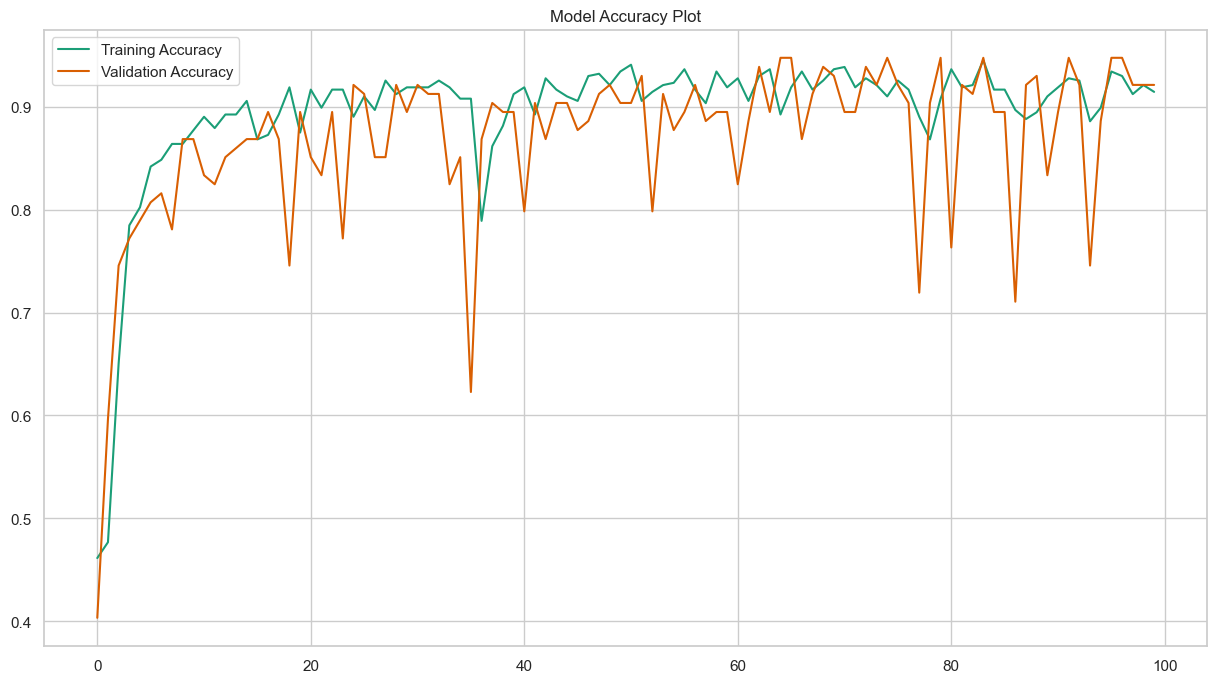

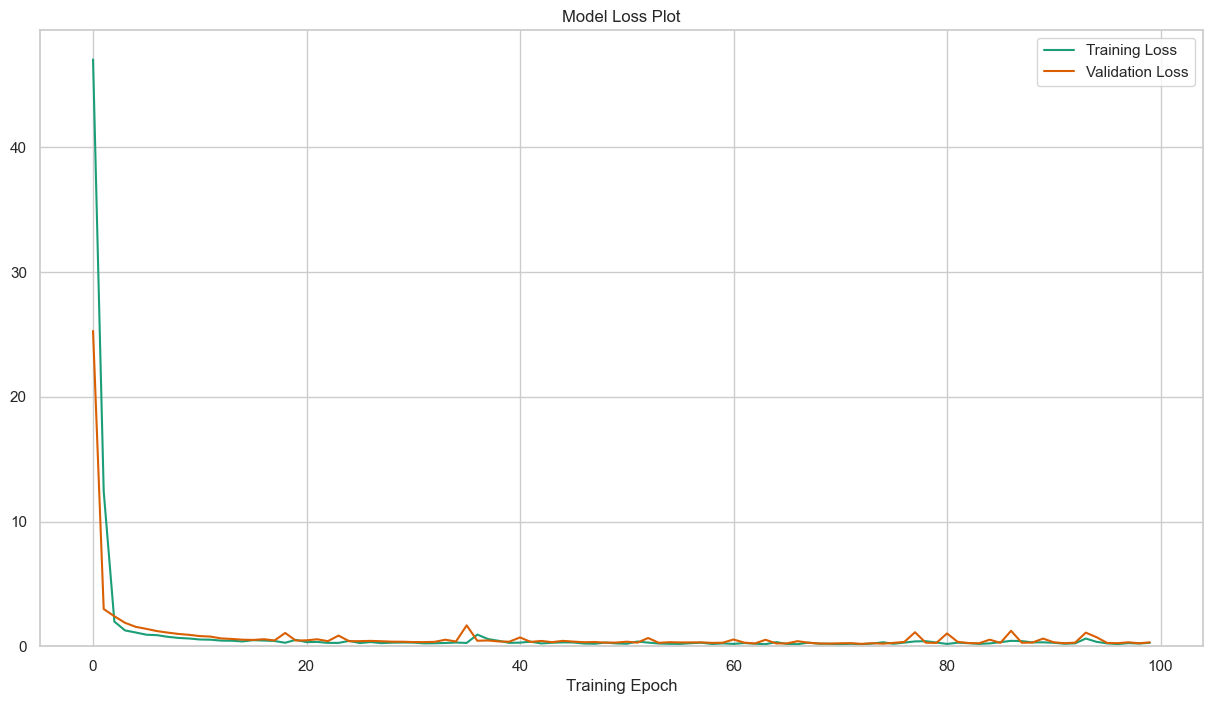

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot loss and accuracy for train and validation data
sns.set_theme(style='whitegrid', palette = 'Dark2')
plt.figure(figsize=(15, 8))
plt.plot(hist.history['acc'], label='Training Accuracy')
plt.plot(hist.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy Plot')
plt.figure(figsize=(15, 8))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Plot')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Class labels
labels = ['Benign', 'Malignant']

#Perform prediction
model_pred = model.predict(x_test) > 0.5

#Create classification report
print(classification_report(model_pred, y_test, target_names=[l for l in labels]))

              precision    recall  f1-score   support

      Benign       0.99      0.89      0.94        75
   Malignant       0.83      0.97      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



Text(0.5, 55.249999999999986, 'Predictions')

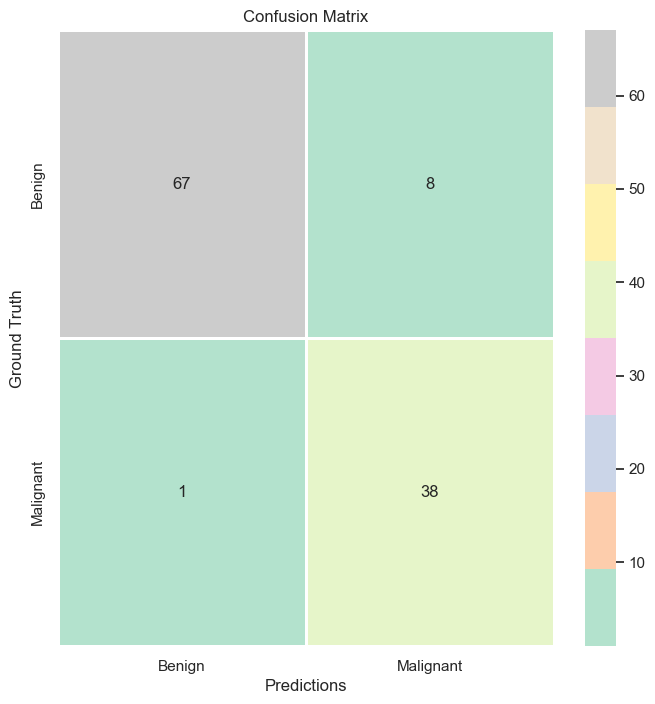

In [12]:
#Calculate and plot confusion matrix
conf_mat = confusion_matrix(model_pred, y_test)
plt.figure(figsize=(8, 8),dpi=100)
sns.heatmap(conf_mat,
            cmap='Pastel2',
            linecolor='white',
            linewidths=1,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Ground Truth')
plt.xlabel('Predictions')

# SHAP Analysis

In [20]:
#import shap package
import shap
shap.initjs()

In [21]:
#Calculate shap values
explainer = shap.DeepExplainer(model, X_train_norm)
shap_values = explainer.shap_values(X_test_norm)

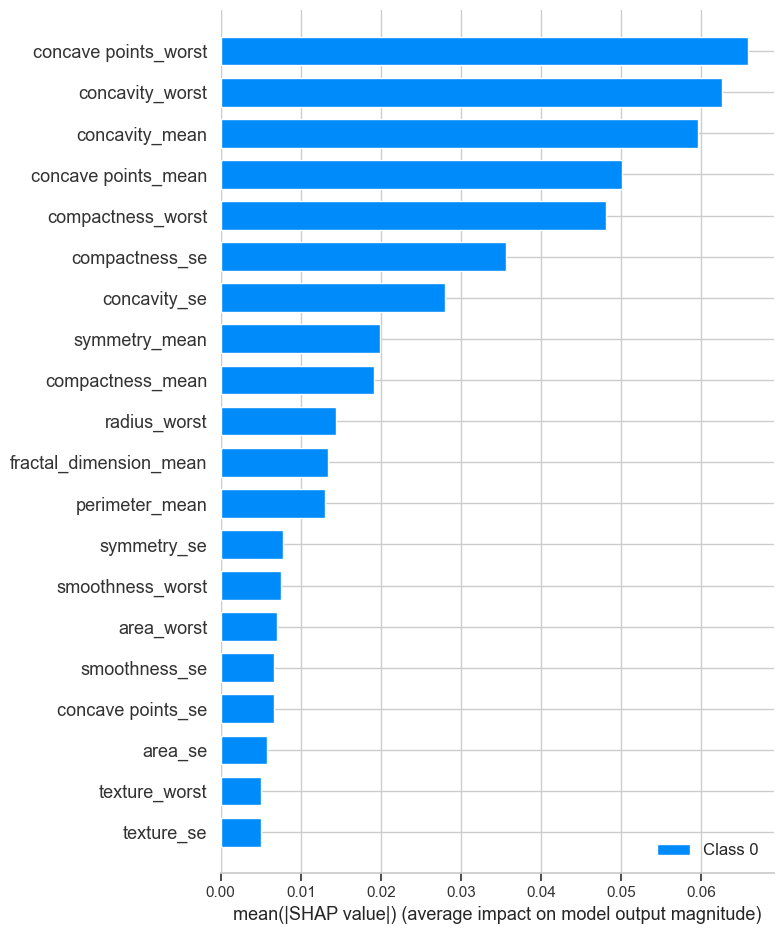

In [26]:
#Visualizing global feature importance using summary plot
shap.summary_plot(shap_values, feature_names = X.columns)

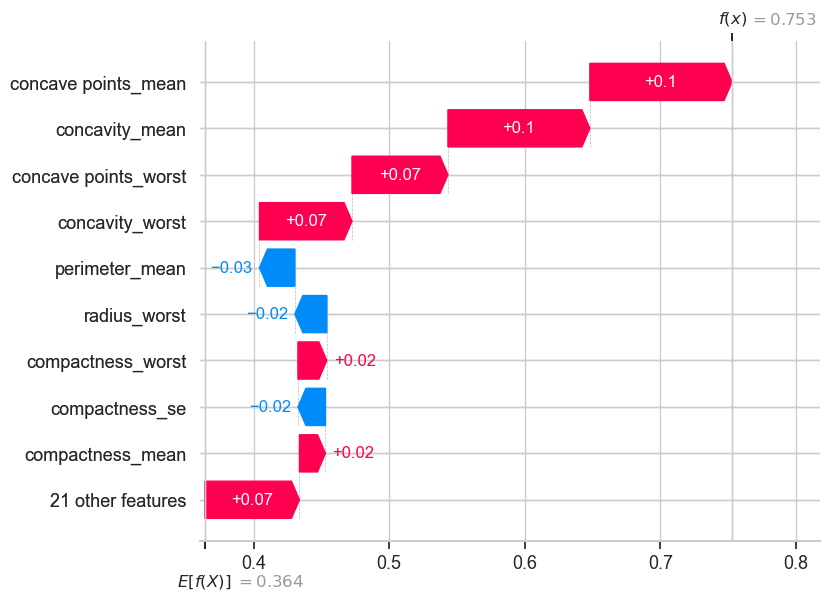

In [16]:
#Visualizing each feature's impact on decision using waterfall plot
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0].numpy(), shap_values[0][0], feature_names = X.columns)

In [17]:
# visualize all the training set predictions
shap.plots.force(explainer.expected_value.numpy(), shap_values[0], feature_names = X.columns)